In [4]:
from tensorflow import keras
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

print(y)
y = y.reshape((len(y),-1))
print(y)

encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(y)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

tf.random.set_seed(42)

'''
model = Sequential([                  
 Input((4)),
 Dense(100, activation='relu'),
 Dense(50, activation='relu'),
 Dense(3, activation='softmax')
])

'''
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (4,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

'''
input = Input(shape=(4,))
x = Dense(100, activation='relu', input_shape = (4,))(input)
x = Dense(50, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(input, output )
'''

# tf.keras.utils.plot_model(model, show_shapes=True)

"\ninput = Input(shape=(4,))\nx = Dense(100, activation='relu', input_shape = (4,))(input)\nx = Dense(50, activation='relu')(x)\noutput = Dense(3, activation='softmax')(x)\nmodel = Model(input, output )\n"

In [10]:
model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

model.fit(X_train,y_train,epochs=100,batch_size=16)
model.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 153       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filin

[0.1346561312675476, 0.9599999785423279]

In [11]:
y_pred  = np.argmax(model(X_test), axis =-1)
print(y_pred)

y_true =  np.argmax(y_test, axis =-1)
print(y_true)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred)
print(cm)
cr = classification_report(y_true, y_pred)
print(cr)

[[19  0  0]
 [ 0 13  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



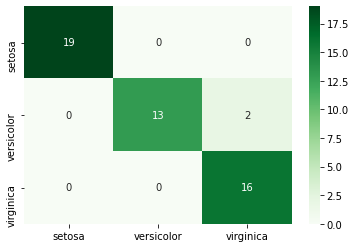

In [ ]:
import seaborn as sns
sns.heatmap(cm,cmap='Greens', annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names)

In [ ]:
# from tensorflow import keras
# import numpy as np
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelBinarizer
# from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.layers import Input,Dense

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :]  
# y = iris.target 

# encoder = LabelBinarizer()
# Y = encoder.fit_transform(y)

# print(Y)

# tf.keras.utils.plot_model(model, show_shapes=True)